In [117]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict , KFold,GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import joblib
import matplotlib.pyplot as plt



In [321]:
df_casas = pd.read_csv('limpio.csv')
df_casas.head(125)


,ciudad_casa,ubicacion,zona,ventaoalquiler,descripespecif,metrajeconstruc,metrajeterreno,precio,unidadterreno,seguridad,piscina/jacuzzi,terraza,baños,parqueo,financiamiento,zon_comercial,areasocial
0,Portoviejo,Tiburcio Macias Esquina,otras zonas / costa & galap.,VENTA,Casa,420.0,1800.0,320000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,Guayaquil,2001 Y Calle Franco Dávila,gquil - centro,VENTA,Edificio,1784.0,400.0,630000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0
2,Guayaquil,Tung. 1101 Y 10 De Agosto,gquil - centro,VENTA,Casa,300.0,400.0,135000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0
3,Quito,Autopista Los Chillos P.#4 Lt# 343,quito - periférico,VENTA,Casa,450.0,4000.0,290000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,Guayaquil,Manz. 198 Villa 24,gquil - ceibos & vía a la costa,VENTA,Casa,100.0,104.0,24000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Manta,Calle 105 Entre 108 Y 109,otras zonas / costa & galap.,VENTA,Hotel,200.0,240.0,200000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
121,Manta,Hotel Cabañas Los Astilleros,otras zonas / costa & galap.,VENTA,Hotel,500.0,1500.0,400000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
122,Guayaquil,Circunvalación,gquil - norte,VENTA,Casa,500.0,2000.0,350000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
123,Guayaquil,Estancias Del Rio,gquil - samborondón,VENTA,Casa,194.0,390.0,169000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [322]:
def_casa_num = pd.get_dummies(df_casas, columns=['zona'])



In [323]:
def_casa_num.head(125)

,ciudad_casa,ubicacion,ventaoalquiler,descripespecif,metrajeconstruc,metrajeterreno,precio,unidadterreno,seguridad,piscina/jacuzzi,...,zona_gquil - centro,zona_gquil - norte,zona_gquil - samborondón,zona_gquil - sur,zona_otras zonas / costa & galap.,zona_otras zonas / sierra & oriente,zona_península & ruta del sol,zona_quito - centro&sur,zona_quito - norte,zona_quito - periférico
0,Portoviejo,Tiburcio Macias Esquina,VENTA,Casa,420.0,1800.0,320000.0,m2,0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,Guayaquil,2001 Y Calle Franco Dávila,VENTA,Edificio,1784.0,400.0,630000.0,m2,0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,Guayaquil,Tung. 1101 Y 10 De Agosto,VENTA,Casa,300.0,400.0,135000.0,m2,0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,Quito,Autopista Los Chillos P.#4 Lt# 343,VENTA,Casa,450.0,4000.0,290000.0,m2,0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,Guayaquil,Manz. 198 Villa 24,VENTA,Casa,100.0,104.0,24000.0,m2,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Manta,Calle 105 Entre 108 Y 109,VENTA,Hotel,200.0,240.0,200000.0,m2,0,0.0,...,0,0,0,0,1,0,0,0,0,0
121,Manta,Hotel Cabañas Los Astilleros,VENTA,Hotel,500.0,1500.0,400000.0,m2,0,0.0,...,0,0,0,0,1,0,0,0,0,0
122,Guayaquil,Circunvalación,VENTA,Casa,500.0,2000.0,350000.0,m2,0,0.0,...,0,1,0,0,0,0,0,0,0,0
123,Guayaquil,Estancias Del Rio,VENTA,Casa,194.0,390.0,169000.0,m2,0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [324]:
x,y = def_casa_num.drop(['precio','ventaoalquiler','ciudad_casa','ubicacion','unidadterreno','descripespecif'], axis=1), def_casa_num['precio']

In [253]:
vars_casas = ['ciudad_casa', 'ubicacion', 'ventaoalquiler', 'descripespecif', 'metrajeconstruc', 'metrajeterreno', 'precio', 'unidadterreno', 'seguridad', 'piscina', 'zona_Gquil - Samborondón', 'zona_Gquil - Sur', 'zona_OTRAS ZONAS / COSTA & GALAP.', 'zona_Otras Zonas / Costa & Galap.', 'zona_Otras Zonas / Sierra & Oriente', 'zona_PENíNSULA & RUTA DEL SOL', 'zona_Península & Ruta del Sol', 'zona_Quito - Centro&Sur', 'zona_Quito - Norte', 'zona_Quito - Periférico']

In [325]:
vars_casas = list(def_casa_num.columns)
vars_casas.remove('precio')
print(vars_casas)

['ciudad_casa', 'ubicacion', 'ventaoalquiler', 'descripespecif', 'metrajeconstruc', 'metrajeterreno', 'unidadterreno', 'seguridad', 'piscina/jacuzzi', 'terraza', 'baños', 'parqueo', 'financiamiento', 'zon_comercial', 'areasocial', 'zona_gquil - ceibos & vía a la costa', 'zona_gquil - centro', 'zona_gquil - norte', 'zona_gquil - samborondón', 'zona_gquil - sur', 'zona_otras zonas / costa & galap.', 'zona_otras zonas / sierra & oriente', 'zona_península & ruta del sol', 'zona_quito - centro&sur', 'zona_quito - norte', 'zona_quito - periférico']


model intercept


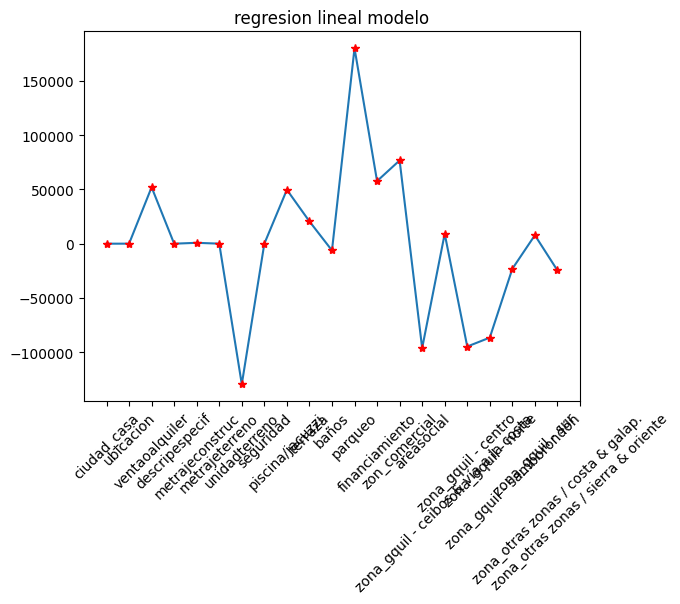

In [326]:
lr_m = Ridge()
lr_m.fit(x,y)
print ("model intercept" % lr_m.intercept_)
plt.xticks(range(len(vars_casas)), vars_casas, rotation=45)
plt.title('regresion lineal modelo')
_ = plt.plot(lr_m.coef_.T, '-',lr_m.coef_.T, 'r*')

In [327]:
print(x.columns)

Index(['metrajeconstruc', 'metrajeterreno', 'seguridad', 'piscina/jacuzzi',
       'terraza', 'baños', 'parqueo', 'financiamiento', 'zon_comercial',
       'areasocial', 'zona_gquil - ceibos & vía a la costa',
       'zona_gquil - centro', 'zona_gquil - norte', 'zona_gquil - samborondón',
       'zona_gquil - sur', 'zona_otras zonas / costa & galap.',
       'zona_otras zonas / sierra & oriente', 'zona_península & ruta del sol',
       'zona_quito - centro&sur', 'zona_quito - norte',
       'zona_quito - periférico'],
      dtype='object')


MAE: 144037.633


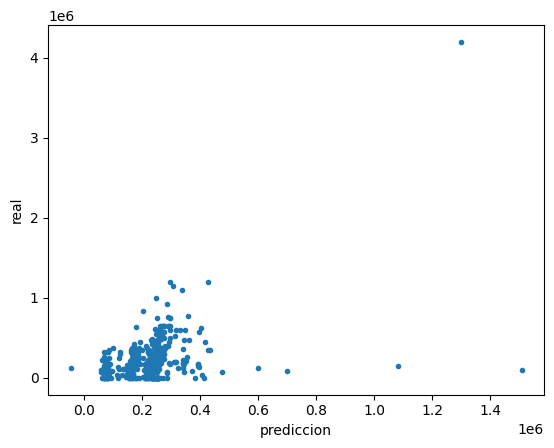

In [328]:
y_pred = lr_m.predict(x)
print('MAE: %.3f' % mean_absolute_error(y, y_pred))
plt.xlabel('prediccion')
plt.ylabel('real')
_ = plt.plot(y_pred, y, '.')

In [329]:

from sklearn  import model_selection


In [330]:
n_folds = 10
kf = KFold(n_folds,shuffle = True)

scores = cross_val_score(lr_m, x, y, scoring='neg_mean_absolute_error', cv=kf,n_jobs=-1)

print ('mean absolute error: %.3f' %(-1.0 * scores.mean()))
print ('std: %.3f' % scores.std())
print ('scores: ', scores)

mean absolute error: 154744.210
std: 32596.229
scores:  [-121082.68866404 -194502.72659826 -205629.94336131 -122548.92023243
 -148362.34306728 -127991.72516213 -174732.51973536 -123296.87477787
 -195827.14151416 -133467.21276714]


Consigo menos errores y veo la tendendencia de los errores

In [331]:
n_folds = 10
kf = KFold(n_folds,shuffle = True)

l_alpha = [2.**k for k in range(-6,10)]
param_grid = {'alpha': l_alpha}

lr_m = Ridge()
ridge_alpa_Search = GridSearchCV(lr_m, param_grid, scoring='neg_mean_absolute_error', cv=kf,n_jobs=-1)
_ = ridge_alpa_Search.fit(x, y)

alpha_range [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]
best alpha {'alpha': 32.0}
best score -157886.7136160088


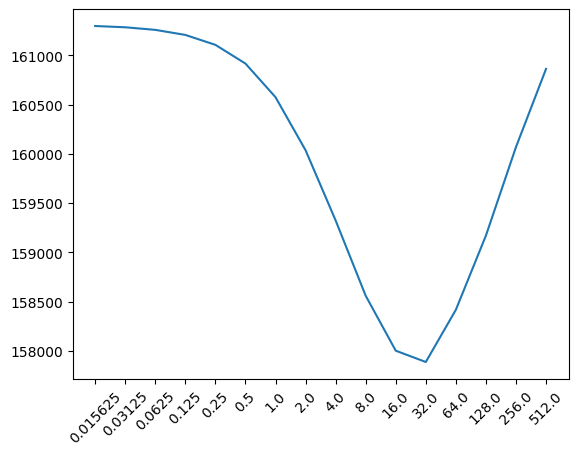

In [332]:

print ("alpha_range %s" % l_alpha)
print ("best alpha %s" % ridge_alpa_Search.best_params_)
print ("best score %s" % ridge_alpa_Search.best_score_)


plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot(-ridge_alpa_Search.cv_results_['mean_test_score'])

In [333]:

kf = KFold(n_folds,shuffle = True)
l_alpha = [32.*2.**(k/2.) for k in range(-6,10)]
param_grid = {'alpha': l_alpha}

lr_m = Ridge()
ridge_alpa_Search = GridSearchCV(lr_m, param_grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-2, verbose=1)
_ = ridge_alpa_Search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


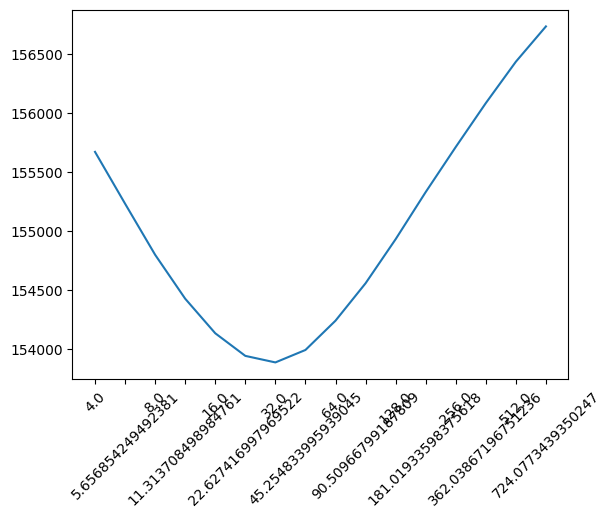

In [334]:



plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot(-ridge_alpa_Search.cv_results_['mean_test_score'])

In [335]:
best_alpha = ridge_alpa_Search.best_params_['alpha']
lr_m=Ridge(alpha=best_alpha)

scores = cross_val_score(lr_m, x, y, scoring='neg_mean_absolute_error', cv=kf,n_jobs=2)

print ('mean absolute error: %.3f' %(-1.0 * scores.mean()))

mean absolute error: 149726.467


In [336]:
y_pred = cross_val_predict(lr_m, x, y)

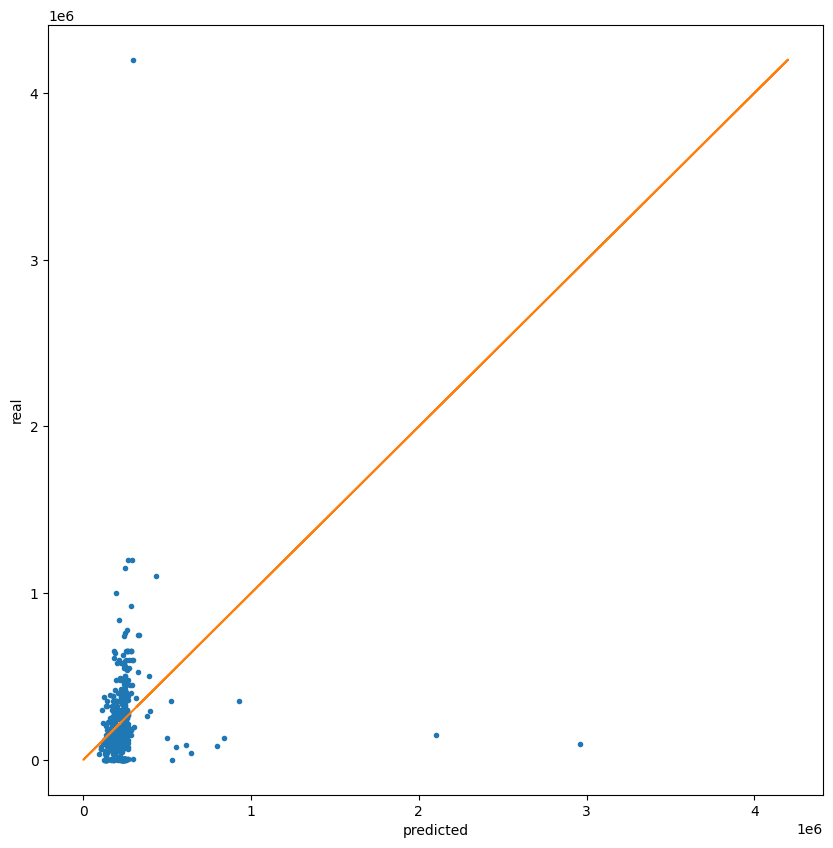

In [337]:
plt.figure(figsize=(10,10))

plt.xlabel('predicted')
plt.ylabel('real')

_ = plt.plot(y_pred, y, '.',y, y, '-')

In [338]:
df_casas.reset_index(drop=True, inplace=True)
df_casas_pred = df_casas.copy()
df_casas_pred.head(125)

,ciudad_casa,ubicacion,zona,ventaoalquiler,descripespecif,metrajeconstruc,metrajeterreno,precio,unidadterreno,seguridad,piscina/jacuzzi,terraza,baños,parqueo,financiamiento,zon_comercial,areasocial
0,Portoviejo,Tiburcio Macias Esquina,otras zonas / costa & galap.,VENTA,Casa,420.0,1800.0,320000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,Guayaquil,2001 Y Calle Franco Dávila,gquil - centro,VENTA,Edificio,1784.0,400.0,630000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0
2,Guayaquil,Tung. 1101 Y 10 De Agosto,gquil - centro,VENTA,Casa,300.0,400.0,135000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0
3,Quito,Autopista Los Chillos P.#4 Lt# 343,quito - periférico,VENTA,Casa,450.0,4000.0,290000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,Guayaquil,Manz. 198 Villa 24,gquil - ceibos & vía a la costa,VENTA,Casa,100.0,104.0,24000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Manta,Calle 105 Entre 108 Y 109,otras zonas / costa & galap.,VENTA,Hotel,200.0,240.0,200000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
121,Manta,Hotel Cabañas Los Astilleros,otras zonas / costa & galap.,VENTA,Hotel,500.0,1500.0,400000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
122,Guayaquil,Circunvalación,gquil - norte,VENTA,Casa,500.0,2000.0,350000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0
123,Guayaquil,Estancias Del Rio,gquil - samborondón,VENTA,Casa,194.0,390.0,169000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [339]:
df_casas_pred['precio_pred'] = y_pred
df_casas_pred.head(100)

,ciudad_casa,ubicacion,zona,ventaoalquiler,descripespecif,metrajeconstruc,metrajeterreno,precio,unidadterreno,seguridad,piscina/jacuzzi,terraza,baños,parqueo,financiamiento,zon_comercial,areasocial,precio_pred
0,Portoviejo,Tiburcio Macias Esquina,otras zonas / costa & galap.,VENTA,Casa,420.0,1800.0,320000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,241322.312347
1,Guayaquil,2001 Y Calle Franco Dávila,gquil - centro,VENTA,Edificio,1784.0,400.0,630000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0,234911.107812
2,Guayaquil,Tung. 1101 Y 10 De Agosto,gquil - centro,VENTA,Casa,300.0,400.0,135000.0,m2,0,0.0,0.0,0,0.0,0.0,1.0,0.0,235455.900746
3,Quito,Autopista Los Chillos P.#4 Lt# 343,quito - periférico,VENTA,Casa,450.0,4000.0,290000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,397297.293830
4,Guayaquil,Manz. 198 Villa 24,gquil - ceibos & vía a la costa,VENTA,Casa,100.0,104.0,24000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,134870.281212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Quito,Chillo Jijon A 5 Minutos De C.c. San Luis,quito - periférico,VENTA,Casa,180.0,110.0,115000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,127112.718303
96,Guayaquil,A 1 Min Riocentro,gquil - samborondón,VENTA,Dpto.,480.0,1082.0,600000.0,m2,1,0.0,0.0,0,0.0,0.0,0.0,0.0,272835.955820
97,GUAYAQUIL,Edificio Vizcaya,gquil - ceibos & vía a la costa,VENTA,DPTO,113.0,113.0,93000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,135490.843796
98,Guayaquil,Balsamos,gquil - norte,VENTA,Casa,400.0,800.0,280000.0,m2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,229007.019229


In [340]:
lr_m.fit(x,y)

Ridge(alpha=32.0)

In [341]:
print(vars_casas)

['ciudad_casa', 'ubicacion', 'ventaoalquiler', 'descripespecif', 'metrajeconstruc', 'metrajeterreno', 'unidadterreno', 'seguridad', 'piscina/jacuzzi', 'terraza', 'baños', 'parqueo', 'financiamiento', 'zon_comercial', 'areasocial', 'zona_gquil - ceibos & vía a la costa', 'zona_gquil - centro', 'zona_gquil - norte', 'zona_gquil - samborondón', 'zona_gquil - sur', 'zona_otras zonas / costa & galap.', 'zona_otras zonas / sierra & oriente', 'zona_península & ruta del sol', 'zona_quito - centro&sur', 'zona_quito - norte', 'zona_quito - periférico']


In [344]:
vars_casas =['metrajeconstruc', 'metrajeterreno', 'seguridad', 'piscina/jacuzzi',
       'terraza', 'baños', 'parqueo', 'financiamiento', 'zon_comercial',
       'areasocial', 'zona_gquil - ceibos & vía a la costa',
       'zona_gquil - centro', 'zona_gquil - norte', 'zona_gquil - samborondón',
       'zona_gquil - sur', 'zona_otras zonas / costa & galap.',
       'zona_otras zonas / sierra & oriente', 'zona_península & ruta del sol',
       'zona_quito - centro&sur', 'zona_quito - norte',
       'zona_quito - periférico']

In [345]:
pd.DataFrame(lr_m.coef_, vars_casas, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
zona_gquil - centro,65467.148485
zona_gquil - samborondón,52519.531680
zona_gquil - norte,30758.441478
zon_comercial,26101.637803
seguridad,17895.787558
areasocial,12814.157076
baños,83.305954
metrajeterreno,31.353087
metrajeconstruc,1.973552
piscina/jacuzzi,0.000000


In [310]:
import seaborn as sns

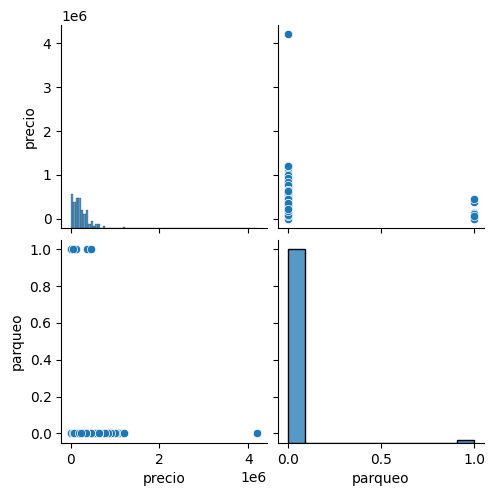

In [311]:
sns.pairplot(df_casas, vars=['precio', 'parqueo'])

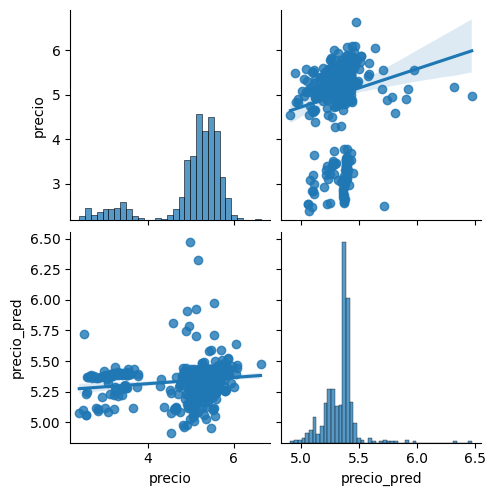

In [312]:
df_casas_pred['precio'] = np.log10(df_casas_pred['precio'])
df_casas_pred['precio_pred'] = np.log10(df_casas_pred['precio_pred'])
sns.pairplot(df_casas_pred, vars=['precio', 'precio_pred'], kind='reg')

In [313]:
df_casas_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ciudad_casa      526 non-null    object 
 1   ubicacion        526 non-null    object 
 2   zona             526 non-null    object 
 3   ventaoalquiler   526 non-null    object 
 4   descripespecif   526 non-null    object 
 5   metrajeconstruc  526 non-null    float64
 6   metrajeterreno   526 non-null    float64
 7   precio           526 non-null    float64
 8   unidadterreno    526 non-null    object 
 9   seguridad        526 non-null    int64  
 10  piscina          526 non-null    float64
 11  terraza          526 non-null    float64
 12  baños            526 non-null    int64  
 13  parqueo          526 non-null    float64
 14  financiamiento   526 non-null    float64
 15  zon_comercial    526 non-null    float64
 16  areasocial       526 non-null    float64
 17  precio_pred     

In [ ]:
    dfcasas_final=[(df_casas_pred['precio'] > 6.5) & (df_casas_pred['precio_pred'] < 6.5)]
    dfcasas_final.head(125)